#Library Imports & Data Loading

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from pathlib import Path

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix, ConfusionMatrixDisplay, auc, precision_recall_curve, average_precision_score


# Setting random seeds for reproducibility
np.random.seed(42)

IMAGES_PATH = Path() / "images"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Dataiku/census_income_learn.csv')

# Defining column names based on the metadata and available information
column_names = [
    'age', 'class_of_worker', 'industry_code', 'occupation_code',
    'education', 'wage_per_hour', 'enrolled_in_edu_inst_last_wk',
    'marital_status', 'major_industry_code', 'major_occupation_code',
    'race', 'hispanic_origin', 'sex', 'member_of_labor_union',
    'reason_for_unemployment', 'full_or_part_time_employment_stat',
    'capital_gains', 'capital_losses', 'dividends_from_stocks',
    'tax_filer_status', 'region_of_previous_residence',
    'state_of_previous_residence', 'detailed_household_and_family_stat',
    'detailed_household_summary_in_household', 'instance_weight',
    'migration_code_change_in_msa', 'migration_code_change_in_reg',
    'migration_code_move_within_reg', 'live_in_this_house_1_year_ago',
    'migration_prev_res_in_sunbelt', 'num_persons_worked_for_employer',
    'family_members_under_18', 'country_of_birth_father',
    'country_of_birth_mother', 'country_of_birth_self', 'citizenship',
    'own_business_or_self_employed', 'fill_inc_questionnaire_for_veteran_admin',
    'veterans_benefits', 'weeks_worked_in_year', 'year', 'income_class'
]

# Assigning column names to the dataframe
df.columns = column_names

In [3]:
df_test = pd.read_csv('/content/drive/MyDrive/Dataiku/census_income_test.csv')

# Assigning column names to the dataframe
df_test.columns = column_names

# Data Exploration

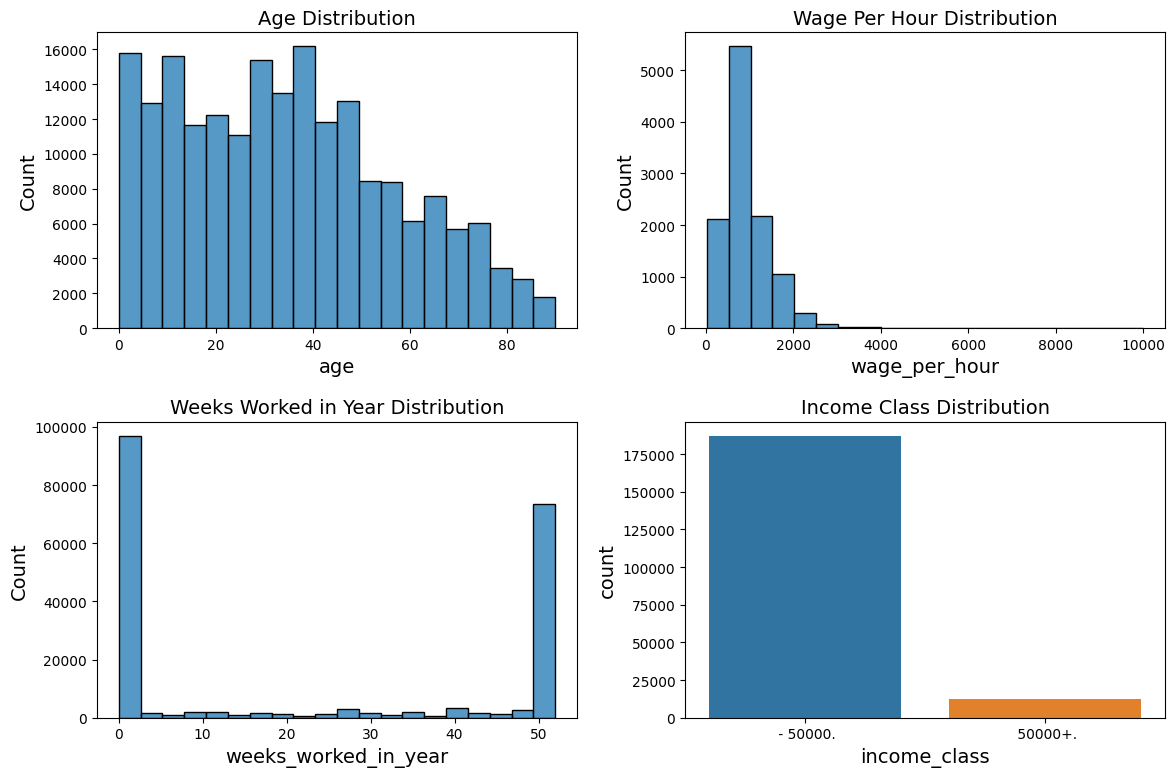

In [ ]:
# Setting up the plotting grid
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

# Plotting the distribution of age
sns.histplot(df['age'], bins=20, ax=axes[0, 0])
axes[0, 0].set_title('Age Distribution')

# Plotting the distribution of wage per hour
sns.histplot(df[df['wage_per_hour'] > 0]['wage_per_hour'], bins=20, ax=axes[0, 1])
axes[0, 1].set_title('Wage Per Hour Distribution')

# Plotting the distribution of weeks worked in year
sns.histplot(df['weeks_worked_in_year'], bins=20, ax=axes[1, 0])
axes[1, 0].set_title('Weeks Worked in Year Distribution')

# Plotting the income class distribution
sns.countplot(data=df, x='income_class', ax=axes[1, 1])
axes[1, 1].set_title('Income Class Distribution')

plt.tight_layout()
plt.show()
#save_fig("distributions_plot")

In [ ]:
# Checking for special or missing values, focusing on the most common categories in each column
most_common_values = df.apply(lambda x: x.value_counts().idxmax())

# Displaying the most common value and its frequency for each column
most_common_values_freq = df.apply(lambda x: x.value_counts().max())

# Combining the results into a DataFrame for better readability
most_common_df = pd.DataFrame({
    'Most Common Value': most_common_values,
    'Frequency': most_common_values_freq
})

most_common_df

,Most Common Value,Frequency
age,34,3489
class_of_worker,Not in universe,100244
industry_code,0,100683
occupation_code,0,100683
education,High school graduate,48406
wage_per_hour,0,188218
enrolled_in_edu_inst_last_wk,Not in universe,186942
marital_status,Never married,86485
major_industry_code,Not in universe or children,100683
major_occupation_code,Not in universe,100683


# Data Preparation

* **Handling Special or Missing Values**
* **Encoding Categorical Variables**
* **Feature Engineering**
* **Data Normalization**

### Handling Special or Missing Values

In [ ]:
# Convert 'outcome_type' into a binary classification target
df['income_class'] = df['income_class'].apply(lambda x: 1 if x == ' 50000+.' else 0)

# Replacing placeholder values with NaN, this time accounting for leading spaces
df.replace([' Not in universe', ' Not in universe or children', ' Children or Armed Forces'], np.nan, inplace=True)

# Checking the number of missing values again after replacement
missing_values_after = df.isnull().sum()

# missing_values_after

To handle missing values I decided to replace them with a separate category labeled `Unknown`, since when the value is missing it might be for a reason that is meaningful to the research question.

For example, `reason_for_unemployment` being missing likely indicates that the person is not unemployed, which is itself informative.

In [ ]:
# Filling NaN values with 'Unknown'
df.fillna('Unknown', inplace=True)

# Verifying that there are no more missing values
missing_values_final = df.isnull().sum()

# missing_values_final

In [4]:
def prepare_df(df):
    # Drop dicriminatory features
    df.drop('race', axis=1, inplace=True)
    df.drop('hispanic_origin', axis=1, inplace=True)
    df.drop('sex', axis=1, inplace=True)
    df.drop('instance_weight', axis=1, inplace=True)
    df.drop('year', axis=1, inplace=True)

    # Convert 'outcome_type' into a binary classification target
    df['income_class'] = df['income_class'].apply(lambda x: 1 if x == ' 50000+.' else 0)

    # Replacing placeholder values with NaN, this time accounting for leading spaces
    df.replace([' Not in universe', ' Not in universe or children', ' Children or Armed Forces'], np.nan, inplace=True)

    # Filling NaN values with 'Unknown'
    df.fillna('Unknown', inplace=True)

    return df

### Encoding Categorical Variables & Data Normalization


In [5]:
numerical_cols = ['age', 'wage_per_hour', 'capital_gains', 'capital_losses',
                  'dividends_from_stocks', 'num_persons_worked_for_employer',
                  'weeks_worked_in_year']

categorical_cols = ['class_of_worker', 'industry_code', 'occupation_code',
                    'education', 'enrolled_in_edu_inst_last_wk', 'marital_status', 'major_industry_code',
                    'major_occupation_code', 'member_of_labor_union', 'reason_for_unemployment', 'full_or_part_time_employment_stat', 'tax_filer_status',
                    'region_of_previous_residence', 'state_of_previous_residence', 'detailed_household_and_family_stat',
                    'detailed_household_summary_in_household', 'migration_code_change_in_msa', 'migration_code_change_in_reg',
                    'migration_code_move_within_reg', 'live_in_this_house_1_year_ago', 'migration_prev_res_in_sunbelt',
                    'family_members_under_18', 'country_of_birth_father', 'country_of_birth_mother', 'country_of_birth_self',
                    'citizenship', 'own_business_or_self_employed', 'fill_inc_questionnaire_for_veteran_admin',
                    'veterans_benefits']

numerical_cols_eng = ['net_capital_gain', 'age_squared', 'avg_wage_per_industry', 'avg_wage_per_occupation']

categorical_cols_eng = ['age_bin', 'has_capital_gain_or_loss']

def create_preprocessor(numerical_cols, categorical_cols):
    # Create transformers
    numerical_transformer = Pipeline(steps=[
        ('scaler', StandardScaler())
    ])

    categorical_transformer = Pipeline(steps=[
        ('ordinalencoder', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
    ])

    # Assemble the column transformer
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numerical_transformer, numerical_cols),
            ('cat', categorical_transformer, categorical_cols)
        ])

    return preprocessor

### Feature Engineering

In [ ]:
# Initializing a fresh DataFrame for engineered features
df_engineered = pd.DataFrame()

# 1. Interaction Features
df_engineered['net_capital_gain'] = df['capital_gains'] - df['capital_losses']

# 2. Polynomial Features
df_engineered['age_squared'] = df['age'] ** 2

# 3. Categorical Aggregations
# Average wage per industry
avg_wage_per_industry = df.groupby('industry_code')['wage_per_hour'].mean()
df_engineered['avg_wage_per_industry'] = df['industry_code'].map(avg_wage_per_industry)

# Average wage per occupation
avg_wage_per_occupation = df.groupby('occupation_code')['wage_per_hour'].mean()
df_engineered['avg_wage_per_occupation'] = df['occupation_code'].map(avg_wage_per_occupation)

# 4. Binning
# Binning age into categories
age_bins = [0, 18, 35, 50, 65, 100]
age_labels = ['0-18', '19-35', '36-50', '51-65', '66-100']
df_engineered['age_bin'] = pd.cut(df['age'], bins=age_bins, labels=age_labels, right=False)

# 5. Boolean Features
# Creating a feature to indicate if a person has any capital gains or losses
df_engineered['has_capital_gain_or_loss'] = ((df['capital_gains'] > 0) | (df['capital_losses'] > 0)).astype(int)

# Showing the first few rows of the engineered features
df_engineered.head()


,net_capital_gain,age_squared,avg_wage_per_industry,avg_wage_per_occupation,age_bin,has_capital_gain_or_loss
0,0,3364,125.038770,154.790311,51-65,0
1,0,324,0.000000,0.000000,19-35,0
2,0,81,0.000000,0.000000,0-18,0
3,0,100,0.000000,0.000000,0-18,0
4,0,2304,114.998789,53.591366,36-50,0


#Data Modeling

In [ ]:
def evaluate_models(X_train, y_train, pipeline=None,
                    models=None, metrics=None, cv=5):
    """
    Evaluates different models using cross-validation.

    Parameters:
    - X_train, y_train: Training data
    - pipeline: A user-provided preprocessing pipeline (if any)
    - models: Dictionary of models to be evaluated
    - metrics: Dictionary of metrics for evaluation
    - cv: Cross validation folds

    Returns:
    - results: A dictionary containing evaluation metrics for each model
    - models: A dictionary containing the trained models
    """

    # Default models
    if models is None:
        models = {
            "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
            "Random Forest": RandomForestClassifier(random_state=42),
            "Gradient Boosting": GradientBoostingClassifier(random_state=42)
        }

    # Default metrics
    if metrics is None:
        metrics = {
            "Accuracy": accuracy_score,
            "Precision": precision_score,
            "Recall": recall_score,
            "F1-Score": f1_score,
            "ROC AUC": roc_auc_score
        }

    # Evaluate each model using cross-validation
    results = {metric: {} for metric in metrics}

    for model_name, model in models.items():
        if pipeline:
            model = Pipeline(steps=[('preprocessor', pipeline),
                                    ('model', model)])
        y_pred = cross_val_predict(model, X_train, y_train, cv=cv, n_jobs=-1)
        probas = cross_val_predict(model, X_train, y_train, cv=cv, method='predict_proba', n_jobs=-1)

        for metric_name, metric_func in metrics.items():
            if metric_name == "ROC AUC":
                score = metric_func(y_train, probas[:, 1])
            else:
                score = metric_func(y_train, y_pred)
            results[metric_name][model_name] = score

    return results, models


### Data Splitting

In [ ]:
# Prepare the train set
df = prepare_df(df)

X = df.drop(columns=['income_class'])
y = df['income_class']

### Model Training

In [ ]:
# Create a preprocessor
preprocessor = create_preprocessor(numerical_cols, categorical_cols)

In [ ]:
# Train the default models
results, models = evaluate_models(X, y, preprocessor)

In [ ]:
pd.DataFrame(results)

,Accuracy,Precision,Recall,F1-Score,ROC AUC
Logistic Regression,0.946322,0.722933,0.218947,0.336102,0.914026
Random Forest,0.953038,0.719918,0.398159,0.512741,0.932968
Gradient Boosting,0.953689,0.751199,0.379422,0.504185,0.942203


Trying to increase performance by training using the weight of each class.

In [ ]:
# Define a balanced model.
model = {
    "Random Forest Balanced": RandomForestClassifier(random_state=42, class_weight='balanced_subsample'),
}

results_balanced, models_balanced = evaluate_models(X, y, preprocessor, models=model)

In [ ]:
pd.DataFrame(results_balanced)

,Accuracy,Precision,Recall,F1-Score,ROC AUC
Random Forest Balanced,0.951073,0.708931,0.358989,0.476624,0.930751


Trying to increase performance by combining the original features with the engineered ones.

In [ ]:
X_combined = pd.concat([X, df_engineered], axis=1)

preprocessor_comb = create_preprocessor(numerical_cols + numerical_cols_eng,
                                        categorical_cols + categorical_cols_eng)

model = {
    "Random Forest Combined": RandomForestClassifier(random_state=42),
}

results_comb, models_comb = evaluate_models(X_combined, y, preprocessor_comb, models=model)

In [ ]:
pd.DataFrame(results_comb)

,Accuracy,Precision,Recall,F1-Score,ROC AUC
Random Forest Balanced,0.953669,0.731963,0.399855,0.517184,0.933487


### Fine Tuning

In [ ]:
# Hyperparameters to tune for the Random Forest model
param_grid = {
    'n_estimators': [100, 150],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

X_processed = preprocessor.fit_transform(X)

# Using GridSearchCV to find the best hyperparameters
rf_grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=2, scoring='f1', n_jobs=-1)
rf_grid_search.fit(X_processed, y)

# Best parameters and corresponding accuracy
best_params = rf_grid_search.best_params_
best_score = rf_grid_search.best_score_

best_params, best_score

({'max_depth': 20,
  'min_samples_leaf': 1,
  'min_samples_split': 2,
  'n_estimators': 150},
 0.4843599745475229)

### Training on the full set

In [6]:
# Prepare the train set
df = prepare_df(df)

X = df.drop(columns=['income_class'])
y = df['income_class']

# Define a preprocessor
preprocessor = create_preprocessor(numerical_cols, categorical_cols)

# Define a model
rf_model = RandomForestClassifier(random_state=42)

# Fit the best model and predict on test set
final_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                ('model', rf_model)])
final_pipeline.fit(X, y)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'wage_per_hour',
                                                   'capital_gains',
                                                   'capital_losses',
                                                   'dividends_from_stocks',
                                                   'num_persons_worked_for_employer',
                                                   'weeks_worked_in_year']),
                                                 ('cat',
                                                  Pipeline(steps=[('ordinalencoder',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unk...
                                                   'migration_code_move_within_reg',
                                                   'live_in_this_house_1_year_ago',
                                                   'migration_prev_res_in_sunbelt',
                                                   'family_members_under_18',
                                                   'country_of_birth_father',
                                                   'country_of_birth_mother',
                                                   'country_of_birth_self',
                                                   'citizenship',
                                                   'own_business_or_self_employed',
                                                   'fill_inc_questionnaire_for_veteran_admin',
                                                   'veterans_benefits'])])),
                ('model', RandomForestClassifier(random_state=42))])

#Model Assessment

<Figure size 600x600 with 0 Axes>

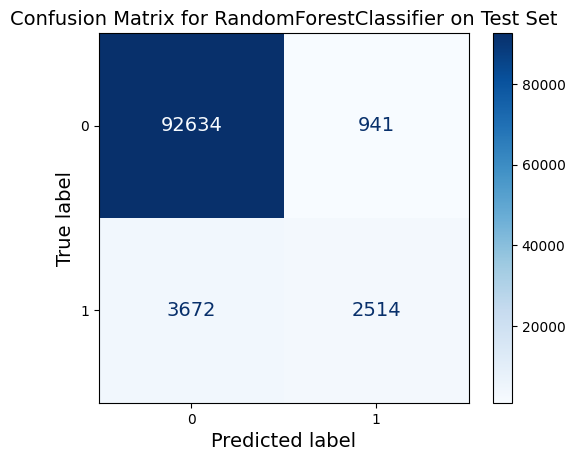

Metrics for RandomForestClassifier on Test Set:
Accuracy: 0.9538
Precision: 0.7276
Recall: 0.4064
F1-Score: 0.5215
ROC AUC: 0.9340


In [7]:
# Prepare the test set for evaluation
df_test = prepare_df(df_test)

X_test = df_test.drop(columns=['income_class'])
y_test = df_test['income_class']

# Evaluate the model on the test set
y_pred_test = final_pipeline.predict(X_test)

# Define some metrics
metrics = {
            "Accuracy": accuracy_score,
            "Precision": precision_score,
            "Recall": recall_score,
            "F1-Score": f1_score,
            "ROC AUC": roc_auc_score
        }

# Display confusion matrix for test set
c_matrix_test = confusion_matrix(y_test, y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=c_matrix_test, display_labels=np.unique(y_test))
plt.figure(figsize=(6, 6))
disp.plot(cmap=plt.cm.Blues)
plt.title(f"Confusion Matrix for RandomForestClassifier on Test Set")
plt.show()

# Compute metrics for the test set
test_metrics_results = {}
for metric_name, metric_func in metrics.items():
    if metric_name == "ROC AUC":
        probas_test = final_pipeline.predict_proba(X_test)
        score = metric_func(y_test, probas_test[:, 1])
    else:
        score = metric_func(y_test, y_pred_test)
    test_metrics_results[metric_name] = score

# Display metrics for the test set
print(f"Metrics for RandomForestClassifier on Test Set:")
for metric_name, score in test_metrics_results.items():
    print(f"{metric_name}: {score:.4f}")

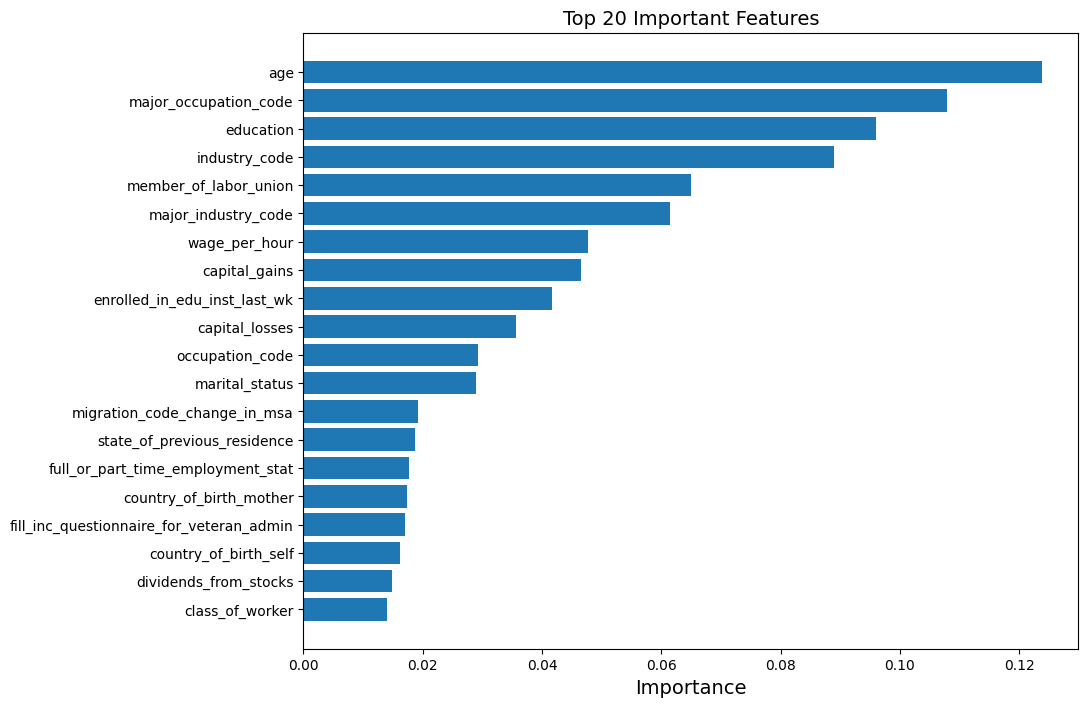

In [8]:
# Extracting feature importances
feature_importances = rf_model.feature_importances_

features_df = pd.DataFrame({
    'Feature': X_test.columns,
    'Importance': feature_importances
})

# Sort the dataframe by importance
features_df = features_df.sort_values(by='Importance', ascending=False)

# Plot the top 20 features
plt.figure(figsize=(10, 8))
plt.barh(features_df['Feature'][:20], features_df['Importance'][:20], align='center')
plt.gca().invert_yaxis()  # Invert y-axis to have the feature with the highest importance at the top
plt.xlabel('Importance')
plt.title('Top 20 Important Features')
plt.show()

In [ ]:
features_df

In [10]:
# Adding a column to categorize features into different types for further analysis
def categorize_feature(feature):
    if "education" in feature or "enroll" in feature:
        return "Educational"
    elif "industry" in feature or "occupation" in feature or "class_of_worker" in feature:
        return "Occupational"
    elif "income" in feature or "gain" in feature or "loss" in feature or "dividends" in feature:
        return "Financial"
    elif "age" in feature or "sex" in feature or "race" in feature or "marital" in feature:
        return "Demographic"
    elif "country" in feature or "citizenship" in feature:
        return "Geographic"
    else:
        return "Other"

# Adding the category information to the feature importance DataFrame
features_df['Category'] = [categorize_feature(feature) for feature in features_df['Feature']]

# Calculating the cumulative importance of each category of features
cumulative_importance_by_category = features_df.groupby('Category')['Importance'].sum()

cumulative_importance_by_category.sort_values(ascending=False)

Category
Occupational    0.301737
Other           0.219969
Demographic     0.200209
Educational     0.137695
Financial       0.097024
Geographic      0.043367
Name: Importance, dtype: float64

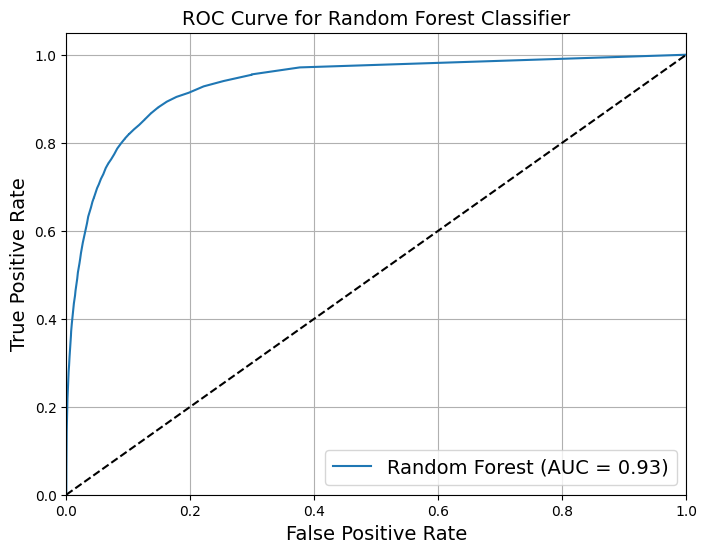

In [9]:
# Compute ROC curve and ROC area for each classifier
y_pred_prob = final_pipeline.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test, y_pred_prob[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Random Forest (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest Classifier')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

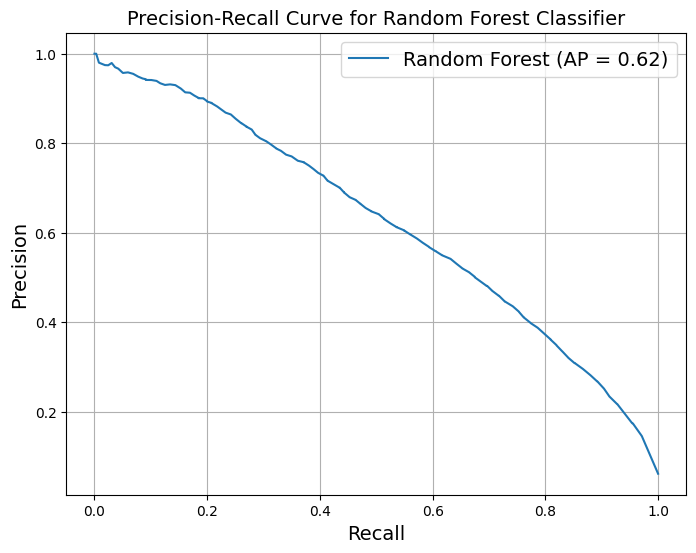

In [10]:
# Compute Precision-Recall curve and average precision
precision, recall, _ = precision_recall_curve(y_test, y_pred_prob[:, 1])
avg_prec = average_precision_score(y_test, y_pred_prob[:, 1])

# Plot the Precision-Recall curves
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'Random Forest (AP = {avg_prec:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Random Forest Classifier')
plt.legend(loc="upper right")
plt.grid(True)
plt.show()